# Rendu Partie notebook evaluation WEB-AI

### 1. importation des librairies et du Dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('backend/apartments.csv')


### 2. Analyses statistiques avec Numpy et Pandas 

In [50]:
# La surface
surface_mean = df['surface'].mean()
surface_std = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()

print(f"Moyenne de la surface: {surface_mean:.2f} m²")
print(f"Écart-type de la surface: {surface_std:.2f} m²")
print(f"Surface minimale: {surface_min} m²")
print(f"Surface maximale: {surface_max} m²")

Moyenne de la surface: 311.80 m²
Écart-type de la surface: 168.83 m²
Surface minimale: 8 m²
Surface maximale: 594 m²


In [51]:
#L'année
annee_mean = df['annee'].mean()
annee_min = df['annee'].min()
annee_max = df['annee'].max()

print(f"Année moyenne de construction: {annee_mean:.0f}")
print(f"Construction la plus ancienne: {annee_min}")
print(f"Construction la plus récente: {annee_max}")

Année moyenne de construction: 2014
Construction la plus ancienne: 2005
Construction la plus récente: 2024


In [52]:
#Le balcon
balcon_count = df['balcon'].value_counts()
balcon_proportion = df['balcon'].mean()

print(f"Nombre d'appartements avec balcon: {balcon_count[True]}")
print(f"Proportion d'appartements avec balcon: {balcon_proportion:.2%}")

Nombre d'appartements avec balcon: 34
Proportion d'appartements avec balcon: 48.57%


In [53]:
#Les catégories de prix
price_category_counts = df['price_category'].value_counts()
print(price_category_counts)

price_category
normal    44
high      17
low        8
scam       1
Name: count, dtype: int64


In [54]:
#Nombre de chambre
rooms_mean = df['nmRooms'].mean()
rooms_median = df['nmRooms'].median()
rooms_variance = df['nmRooms'].var()
rooms_std = df['nmRooms'].std()

print(f"Moyenne du nombre de chambres: {rooms_mean:.2f}")
print(f"Médiane du nombre de chambres: {rooms_median}")
print(f"Variance du nombre de chambres: {rooms_variance:.2f}")
print(f"Écart-type du nombre de chambres: {rooms_std:.2f}")

Moyenne du nombre de chambres: 5.63
Médiane du nombre de chambres: 5.0
Variance du nombre de chambres: 8.96
Écart-type du nombre de chambres: 2.99


### 3. Visualisations avec Matplotlib

Diagramme à barres pour la répartition des catégories de prix : 

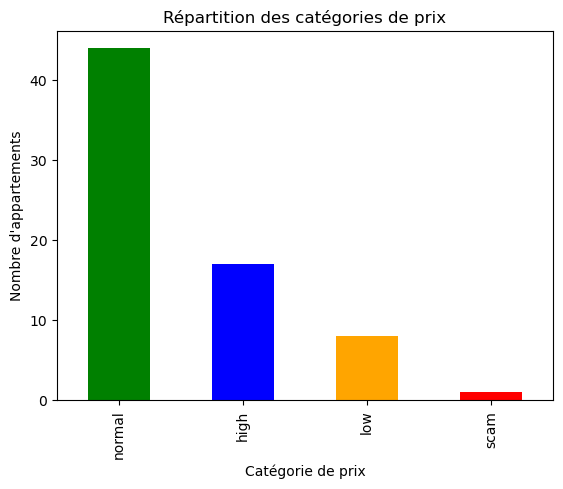

In [55]:


price_category_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title('Répartition des catégories de prix')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre d\'appartements')
plt.show()


BONUS : Heatmap année de construction et prix

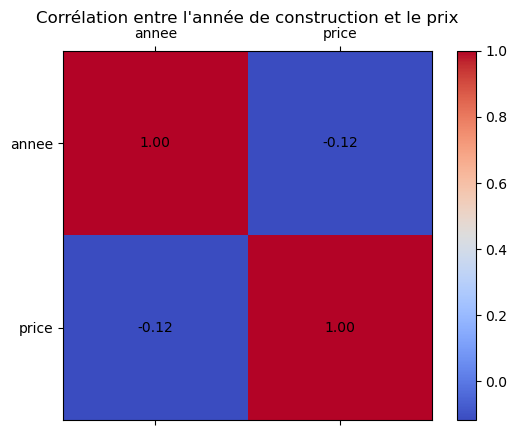

In [57]:

corr_matrix = df[['annee', 'price']].corr()


fig, ax = plt.subplots()

cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)


for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center')


ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['annee', 'price'])
ax.set_yticklabels(['annee', 'price'])


plt.title('Corrélation entre l\'année de construction et le prix', pad=20)


plt.show()

## Partie Modélisation et Prédictions

1. Prédiction de la note en fonction de la ville, de la surface et du prix

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import pickle


X = df[['ville', 'surface', 'price']]
y = df['note']


encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['ville']]).toarray()
encoded_features = encoder.get_feature_names_out(['ville'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_features)


X_final = pd.concat([X_encoded_df, X[['surface', 'price']].reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"Coefficient de détermination R²: {r2:.2f}")
print(f"Erreur quadratique moyenne RMSE: {rmse:.2f}")


with open('models/model_note.pkl', 'wb') as f:
    pickle.dump(model, f)


with open('models/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)




Coefficient de détermination R²: 0.03
Erreur quadratique moyenne RMSE: 1.26


2. Prédiction de l'année en fonction de la ville

In [60]:
X = df[['ville']]
y = df['annee']


X_encoded = encoder.fit_transform(X).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Coefficient de détermination R²: {r2:.2f}")
print(f"Erreur quadratique moyenne RMSE: {rmse:.2f} années")


with open('models/model_annee.pkl', 'wb') as f:
    pickle.dump(model, f)




Coefficient de détermination R²: 0.14
Erreur quadratique moyenne RMSE: 5.05 années


3. Prédiction garage

In [61]:
from sklearn.linear_model import LogisticRegression

X = df[['price', 'ville']]
y = df['garage']

# Encodage de 'ville'
X_encoded = encoder.fit_transform(X[['ville']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

X_final = pd.concat([X_encoded_df, X[['price']].reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")



with open('models/model_garage.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)





Accuracy: 42.86%
Recall: 57.14%
F1 Score: 50.00%


4. Prédiction balcon KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['price', 'ville']]
y = df['balcon']

# Encodage de 'ville'
X_encoded = encoder.fit_transform(X[['ville']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

X_final = pd.concat([X_encoded_df, X[['price']].reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

print(f"Accuracy KNN: {accuracy_knn:.2%}")
print(f"Recall KNN: {recall_knn:.2%}")
print(f"F1 Score KNN: {f1_knn:.2%}")


# Pour la logistic regression (garage)
print("Logistic Regression (Garage):")
print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Pour le KNN (balcon)
print("\nKNN Classification (Balcon):")
print(f"Accuracy: {accuracy_knn:.2%}")
print(f"Recall: {recall_knn:.2%}")
print(f"F1 Score: {f1_knn:.2%}")


with open('models/model_balcon.pkl', 'wb') as f:
    pickle.dump(knn_model, f)



Accuracy KNN: 42.86%
Recall KNN: 42.86%
F1 Score KNN: 42.86%
Logistic Regression (Garage):
Accuracy: 42.86%
Recall: 57.14%
F1 Score: 50.00%

KNN Classification (Balcon):
Accuracy: 42.86%
Recall: 42.86%
F1 Score: 42.86%
